# Arithmetic

In [2]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `Add`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a+b\rangle$ using $4n - 4 T$ gates.

#### Parameters
 - `bitsize`: Number of bits used to represent each integer. Must be large enough to hold the result in the output register of a + b, or else it simply drops the most significant bits. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `b`: A bitsize-sized input/output register (register b above). 

#### References
[Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648)


In [2]:
from qualtran.bloqs.arithmetic import Add

bloq = Add(bitsize=4)
show_bloq(bloq)

## `Product`
Compute the product of an `n` and `m` bit binary number.

Implements $U|a\rangle|b\rangle|0\rangle -\rightarrow
|a\rangle|b\rangle|a\times b\rangle$ using $2nm-n$ Toffolis.

#### Parameters
 - `a_bitsize`: Number of bits used to represent the first integer.
 - `b_bitsize`: Number of bits used to represent the second integer. 

#### Registers
 - `a`: a_bitsize-sized input register.
 - `b`: b_bitsize-sized input register.
 - `result`: A 2*max(a_bitsize, b_bitsize) bit-sized output register to store the result a*b. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767) pg 81 gives a Toffoli complexity for multiplying two numbers.


In [ ]:
from qualtran.bloqs.arithmetic import Product

bloq = Product(a_bitsize=4, b_bitsize=6)
show_bloq(bloq)

## `Square`
Square an n-bit binary number.

Implements $U|a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle$ using $n^2 - n$ Toffolis.

#### Parameters
 - `bitsize`: Number of bits used to represent the integer to be squared. The result is stored in a register of size 2*bitsize. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `result`: A 2-bitsize-sized input/output register. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). pg 76 for Toffoli complexity.


In [ ]:
from qualtran.bloqs.arithmetic import Square

bloq = Square(bitsize=8)
show_bloq(bloq)

## `SumOfSquares`
Compute the sum of squares of k n-bit binary numbers.

Implements $U|a\rangle|b\rangle\dots k\rangle|0\rangle \rightarrow
    |a\rangle|b\rangle\dots|k\rangle|a^2+b^2+\dots k^2\rangle$ using
    $4 k n^2 T$ gates.

The number of bits required by the output register is 2*bitsize + ceil(log2(k)).

#### Parameters
 - `bitsize`: Number of bits used to represent each of the k integers.
 - `k`: The number of integers we want to square. 

#### Registers
 - `input`: k n-bit registers.
 - `result`: 2 * bitsize + ceil(log2(k)) sized output register. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767) pg 80 give a Toffoli complexity for squaring.


In [ ]:
from qualtran.bloqs.arithmetic import SumOfSquares

bloq = SumOfSquares(bitsize=8, k=4)
show_bloq(bloq)

## `GreaterThan`
Compare two integers.

Implements $U|a\rangle|b\rangle|0\rangle \rightarrow
|a\rangle|b\rangle|b > a\rangle$ using $4n$ T  gates.

The bloq_counts and t_complexity are derived from equivalent qualtran gates
assuming a clean decomposition which should yield identical costs.

See: [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648) and
    [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2306.08585)

#### Parameters
 - `bitsize`: Number of bits used to represent the two integers a and b.
 - `signed`: A boolean condition which controls whether the a and b registers are represented
                in 2's Complement or Unsigned. This effects the decomposition of the comparison because
                it relies on the 1's complement trick described above which only works for signed
                values. If the input registers are unsigned we use 2 ancilla bits to represent the
                registers in 2's complement.

#### Registers
 - `a`: n-bit-sized input registers.
 - `b`: n-bit-sized input registers.
 - `target`: A single bit output register to store the result of B > A.


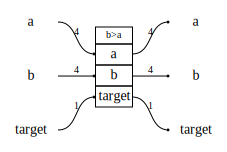

In [3]:
from qualtran.bloqs.arithmetic import GreaterThan

bloq = GreaterThan(bitsize=4, signed=True)
show_bloq(bloq)

## `GreaterThanConstant`
Implements $U_a|x\rangle = U_a|x\rangle|z\rangle = |x\rangle |z \land (x > a)\rangle$

The bloq_counts and t_complexity are derived from equivalent qualtran gates
assuming a clean decomposition which should yield identical costs.

See: https://github.com/quantumlib/Qualtran/pull/381 and
https://qualtran.readthedocs.io/en/latest/bloqs/comparison_gates.html


#### Parameters
 - `bitsize`: bitsize of x register.
 - `val`: integer to compare x against (a above.) 

#### Registers
 - `x`: Register to compare against val.
 - `target`: Register to hold result of comparison.


In [ ]:
from qualtran.bloqs.arithmetic import GreaterThanConstant

bloq = GreaterThanConstant(bitsize=4, val=13)
show_bloq(bloq)

## `EqualsAConstant`
Implements $U_a|x\rangle = U_a|x\rangle|z\rangle = |x\rangle |z \land (x = a)\rangle$

The bloq_counts and t_complexity are derived from:
https://qualtran.readthedocs.io/en/latest/bloqs/comparison_gates.html#equality-as-a-special-case

#### Parameters
 - `bitsize`: bitsize of x register.
 - `val`: integer to compare x against (a above.) 

#### Registers
 - `x`: Register to compare against val.
 - `target`: Register to hold result of comparison.


In [ ]:
from qualtran.bloqs.arithmetic import EqualsAConstant

bloq = EqualsAConstant(bitsize=4, val=13)
show_bloq(bloq)

## `ToContiguousIndex`
Build a contiguous register s from mu and nu.

$$
    s = \nu (\nu + 1) / 2 + \mu
$$

Assuming nu is zero indexed (in contrast to the THC paper which assumes 1,
hence the slightly different formula).

#### Parameters
 - `bitsize`: number of bits for mu and nu registers.
 - `s_bitsize`: Number of bits for contiguous register. 

#### Registers
 - `mu`: input register
 - `nu`: input register
 - `s`: output contiguous register 

#### References
(Even more efficient quantum computations of chemistry through tensor hypercontraction)[https://arxiv.org/pdf/2011.03494.pdf] Eq. 29.


In [ ]:
from qualtran.bloqs.arithmetic import ToContiguousIndex

bloq = ToContiguousIndex(bitsize=4, s_bitsize=8)
show_bloq(bloq)

## `ScaleIntByReal`
Scale an integer by fixed-point representation of a real number.

i.e.

$$
    |r\rangle|i\rangle|0\rangle \rightarrow |r\rangle|i\rangle|r \times i\rangle
$$

The real number is assumed to be in the range [0, 1).

#### Parameters
 - `r_bitsize`: Number of bits used to represent the real number.
 - `i_bitsize`: Number of bits used to represent the integer. 

#### Registers
 - `- real_in`: r_bitsize-sized input register.
 - `- int_in`: i_bitsize-sized input register.
 - `- result`: r_bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization] (https://arxiv.org/pdf/2007.07391.pdf) pg 70.


In [ ]:
from qualtran.bloqs.arithmetic import ScaleIntByReal

bloq = ScaleIntByReal(r_bitsize=8, i_bitsize=12)
show_bloq(bloq)

## `MultiplyTwoReals`
Multiply two fixed-point representations of real numbers

i.e.

$$
    |a\rangle|b\rangle|0\rangle \rightarrow |a\rangle|b\rangle|a \times b\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `- a`: bitsize-sized input register.
 - `- b`: bitsize-sized input register.
 - `- result`: bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization] (https://arxiv.org/pdf/2007.07391.pdf) pg 71.


In [ ]:
from qualtran.bloqs.arithmetic import MultiplyTwoReals

bloq = MultiplyTwoReals(bitsize=10)
show_bloq(bloq)

## `SquareRealNumber`
Square a fixed-point representation of a real number

i.e.

$$
    |a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `- a`: bitsize-sized input register.
 - `- b`: bitsize-sized input register.
 - `- result`: bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization ](https://arxiv.org/pdf/2007.07391.pdf) pg 74.


In [ ]:
from qualtran.bloqs.arithmetic import SquareRealNumber

bloq = SquareRealNumber(bitsize=10)
show_bloq(bloq)

## `SignedIntegerToTwosComplement`
Convert a register storing the signed integer representation to two's complement inplace.

#### Parameters
 - `bitsize`: size of the register. 

Regs:
    x: input signed integer register to convert to two-complement.

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization]( https://arxiv.org/abs/2105.12767) page 24, 4th paragraph from the bottom.


In [ ]:
from qualtran.bloqs.arithmetic import SignedIntegerToTwosComplement

bloq = SignedIntegerToTwosComplement(bitsize=10)
show_bloq(bloq)